# The Gemika's Magical Guide to Sorting Hogwarts Students using the Decision Tree Algorithm (Part #7)

![machine-learning-03.jpg](images/machine-learning-30.jpg)

---

## **7. Casting One-Hot Encoding Spells 🏰✨**

The air is thick with the scent of parchment and the crackle of magical energy, as we delve into the depths of data wizardry. Today, we shall explore a spellbinding technique known as **One-Hot Encoding**. Imagine transforming a mischievous **Pixie**, with its vibrant personality and unpredictable nature, into a series of precise coordinates on a magical map. That, dear reader, is the essence of **One-Hot Encoding**. 🧙‍♂️✨ 

Just as Professor McGonagall's wand can turn a teacup into a `Dachshund`, this spell can turn `categorical` data – those pesky labels that refuse to conform to `numerical` calculations – into a format our models can understand. Think of it as turning a chaotic swarm of `Hufflepuffs`, `Ravenclaws`, `Gryffindors`, and `Slytherins` into a neat grid of ones and zeros, each representing a specific house. 🏰✨ 

With `One-Hot Encoding`, we create `new columns` for each `unique category`, filling them with `ones` and `zeros` to indicate `presence` or `absence`. It’s like sorting mischievous house-elves into their designated rooms, ensuring each has its own space. By the end of this chapter, you'll be able to cast this spell with the confidence of a seasoned `Charms` master, transforming your data from a tangled knot into a beautifully organized tapestry. 🪄✨

---

### **7.1 Categorical Data: Sorting Hats and Magical Labels**

In the enchanting realm of data science, where numbers dance and patterns reveal themselves, we encounter a curious breed of information known as *categorical data*. Unlike their numerical counterparts, these data points don't represent quantities but rather distinct categories or groups. 

Imagine the Sorting Hat at Hogwarts, that wise old magical object that places students into their rightful houses. The houses – `Gryffindor`, `Hufflepuff`, `Ravenclaw`, and `Slytherin` – are examples of categorical data. They represent distinct groups with unique characteristics, just like the houses themselves. Similarly, the type of pet a student chooses – a loyal `owl`, a purring `cat`, or a grumpy `toad` – also falls into the category of categorical data. 

Categorical data is like placing **magical labels** on objects, helping us **differentiate** and **classify them**. Just as a Herbology student would meticulously categorize different plants based on their properties, we use categorical data to sort and understand the diverse elements within our datasets. By understanding these magical labels, we can unlock hidden patterns and cast powerful spells (analyses) to uncover the secrets of our data. 🪄✨

Let's seek some further knowledge, what values lie beneath the `House` column, cast your wand dear sorcerers.

In [77]:
# Path to our dataset
dataset_path = 'data/hogwarts-students-02.csv'

# Reading the dataset
hogwarts_df = pd.read_csv(dataset_path)

# Displaying the unique categories in the 'House' column
unique_houses = hogwarts_df['house'].unique()
print(f"Unique Houses: {unique_houses}")

Unique Houses: ['Gryffindor' 'Slytherin' 'Ravenclaw' 'Hufflepuff' 'Durmstrang'
 'Beauxbatons']


Understanding these categories is crucial because our `magical algorithms` (or models) need to know how to interpret this data. However, these algorithms often struggle with `non-numerical` data, as they are more comfortable with numbers. This is where the magic of `One-Hot Encoding` comes into play.

---

### **7.2 Transforming Categorical Data using One-Hot Encoding**

Imagine our Hogwarts student records, filled with enchanting details like house, wand type, and favorite subject. These qualities are like **magical sigils**, carrying unique energies. However, our brilliant data models, while capable of wondrous feats, cannot decipher these sigils directly. We must transform them into a language they understand – numbers.

Enter the spell of **One-Hot Encoding**, a powerful incantation that reveals the hidden essence of each categorical variable. It's like casting a **Lumos spell** on a **hidden chamber**, illuminating every nook and cranny. With a flick of our coding wand, we transform each category into its own standalone column. If a student belongs to Gryffindor, for instance, a '1' will magically appear in the Gryffindor column, while the other house columns remain dark.

This transformation is akin to creating a magical tapestry, where each thread represents a category. By weaving these threads together, we create a rich and detailed portrait of our students, ready to be analyzed by our data models. It's as if we're granting our models the ability to see the world through the eyes of a **Polyjuice Potion** drinker, experiencing each student's unique perspective. Let's go ahead and try to One-Hot Encoding our first column or feature, will try the `gender` column first. 

In [78]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display, HTML

# Assuming hogwarts_df is already defined and contains the 'gender' column

# Applying One-Hot Encoding to the 'gender' column
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter name
encoded_data = encoder.fit_transform(hogwarts_df[['gender']])

# Converting the encoded data into a DataFrame and attaching it to the original dataset
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender']))
hogwarts_df = pd.concat([hogwarts_df, encoded_df], axis=1)

# Dropping the original 'gender' column as it's now encoded
hogwarts_df.drop('gender', axis=1, inplace=True)

# Displaying the transformed DataFrame in a scrollable pane
html = hogwarts_df.to_html()  # Convert DataFrame to HTML
scrollable_html = f"""
<div style="height: 300px; overflow: auto;">
    {html}
</div>
"""
display(HTML(scrollable_html))

,name,age,origin,specialty,house,blood_status,pet,wand_type,patronus,quidditch_position,boggart,favorite_class,house_points,gender_Female,gender_Male
0,Harry Potter,11,England,Defense Against the Dark Arts,Gryffindor,Half-blood,Owl,Holly,Stag,Seeker,Dementor,Defense Against the Dark Arts,150.0,0.0,1.0
1,Hermione Granger,11,England,Transfiguration,Gryffindor,Muggle-born,Cat,Vine,Otter,Seeker,Failure,Arithmancy,200.0,1.0,0.0
2,Ron Weasley,11,England,Chess,Gryffindor,Pure-blood,Rat,Ash,Jack Russell Terrier,Keeper,Spider,Charms,50.0,0.0,1.0
3,Draco Malfoy,11,England,Potions,Slytherin,Pure-blood,Owl,Hawthorn,Non-corporeal,Seeker,Lord Voldemort,Potions,100.0,0.0,1.0
4,Luna Lovegood,11,Ireland,Creatures,Ravenclaw,Half-blood,Owl,Fir,Hare,Seeker,Her mother,Creatures,120.0,1.0,0.0
5,Neville Longbottom,11,England,Herbology,Gryffindor,Pure-blood,Toad,Cherry,Non-corporeal,Seeker,Severus Snape,Herbology,70.0,0.0,1.0
6,Ginny Weasley,11,England,Defense Against the Dark Arts,Gryffindor,Pure-blood,Owl,Yew,Horse,Chaser,Tom Riddle,Defense Against the Dark Arts,140.0,1.0,0.0
7,Cedric Diggory,15,England,Quidditch,Hufflepuff,Pure-blood,Owl,Ash,Non-corporeal,Seeker,Failure,Defense Against the Dark Arts,160.0,0.0,1.0
8,Cho Chang,14,Scotland,Charms,Ravenclaw,Half-blood,Owl,Hazel,Swan,Seeker,Failure,Charms,110.0,1.0,0.0
9,Severus Snape,16,England,Potions,Slytherin,Half-blood,Owl,Elm,Doe,Seeker,Lily Potter,Potions,90.0,0.0,1.0


And if you scroll to the right, you might notice that the dataset now has additional two columns, the `gender_Female` and the `gender_Male` on top of the existing one, while dropping the original `gender` column that was there previously.

---

### **7.3 Identifying the Remaining Data Types in the Data Set**

---

In [79]:
# This aggreates the data by its column names, then we pass the aggregation function (size = count)
hogwarts_df.groupby(by =['house', 'blood_status']).count()

name  age  origin  specialty  pet  wand_type  patronus  quidditch_position  boggart  favorite_class  house_points  gender_Female  gender_Male
house       blood_status                                                                                                                                               
Beauxbatons Half-blood       3    3       3          3    3          3         3                   3        3               3             3              3            3
Durmstrang  Half-blood       1    1       1          1    1          1         1                   1        1               1             1              1            1
            Pure-blood       1    1       1          1    1          1         1                   1        1               1             1              1            1
Gryffindor  Half-blood       8    8       8          8    8          8         8                   8        8               8             8              8            8
            Muggle-born      2    2       2          2    2          2         2                   2        2               2             2              2            2
            Pure-blood       8    8       8          8    8          8         8                   8        8               8             8              8            8
Hufflepuff  Half-blood       3    3       3          3    3          3         3                   3        3               3             3              3            3
            No-mag           1    1       1          1    1          1         1                   1        1               1             1              1            1
            Pure-blood       3    3       3          3    3          3         3                   3        3               3             3              3            3
Ravenclaw   Half-blood       6    6       6          6    6          6         6                   6        6               6             6              6            6
            Pure-blood       2    2       2          2    2          2         2                   2        2               2             2              2            2
Slytherin   Half-blood       4    4       4          4    4          4         4                   4        4               4             4              4            4
            Pure-blood      10   10      10         10   10         10        10                  10       10              10            10             10           10

### **7.2 Visualizing Relationships between Features**

Next, we weave a more intricate spell, exploring the relationships between different features in our dataset. For instance, does a student’s heritage influence their choice of pet, or is there a connection between a student’s age and the type of wand they use? This step is like exploring the Forbidden Forest, uncovering the connections and mysteries that lie within.

In [80]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display, HTML

# Assuming hogwarts_df is already defined and contains the necessary columns

# List of columns to be One-Hot Encoded
columns_to_encode = [
    'origin', 'specialty', 'house', 'blood_status', 
    'pet', 'wand_type', 'patronus', 'quidditch_position', 
    'boggart', 'favorite_class'
]

# Creating an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# List to hold encoded DataFrames
encoded_dfs = []

# Applying One-Hot Encoding to each column and storing the result
for column in columns_to_encode:
    encoded_data = encoder.fit_transform(hogwarts_df[[column]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([column]))
    encoded_dfs.append(encoded_df)

# Concatenating all encoded DataFrames into one
encoded_df_combined = pd.concat(encoded_dfs, axis=1)

# Concatenating the encoded DataFrame with the original DataFrame
hogwarts_df = pd.concat([hogwarts_df, encoded_df_combined], axis=1)

# Dropping the original columns that were encoded
hogwarts_df.drop(columns=columns_to_encode, inplace=True)

# Displaying the transformed DataFrame in a scrollable pane
html = hogwarts_df.to_html()  # Convert DataFrame to HTML
scrollable_html = f"""
<div style="height: 300px; overflow: auto;">
    {html}
</div>
"""
display(HTML(scrollable_html))

,name,age,house_points,gender_Female,gender_Male,origin_Bulgaria,origin_England,origin_Europe,origin_France,origin_Indonesia,origin_Ireland,origin_Scotland,origin_USA,origin_Wales,specialty_Auror,specialty_Baking,specialty_Charms,specialty_Chess,specialty_Creatures,specialty_Dark Arts,specialty_Defense Against the Dark Arts,specialty_Dueling,specialty_Goat Charming,specialty_Gossip,specialty_Herbology,specialty_History of Magic,specialty_Household Charms,specialty_Legilimency,specialty_Magical Creatures,specialty_Memory Charms,specialty_Metamorphmagus,specialty_Muggle Artifacts,specialty_Obscurus,specialty_Potions,specialty_Quidditch,specialty_Strength,specialty_Transfiguration,specialty_Transformation,house_Beauxbatons,house_Durmstrang,house_Gryffindor,house_Hufflepuff,house_Ravenclaw,house_Slytherin,blood_status_Half-blood,blood_status_Muggle-born,blood_status_No-mag,blood_status_Pure-blood,pet_Cat,pet_Demiguise,pet_Dog,pet_Goat,pet_Owl,pet_Phoenix,pet_Rat,pet_Snake,pet_Toad,wand_type_Alder,wand_type_Ash,wand_type_Birch,wand_type_Blackthorn,wand_type_Cedar,wand_type_Cherry,wand_type_Chestnut,wand_type_Cypress,wand_type_Ebony,wand_type_Elder,wand_type_Elm,wand_type_Fir,wand_type_Hawthorn,wand_type_Hazel,wand_type_Hemlock,wand_type_Holly,wand_type_Hornbeam,wand_type_Maple,wand_type_Oak,wand_type_Pine,wand_type_Rosewood,wand_type_Rowan,wand_type_Sword,wand_type_Teak,wand_type_Vine,wand_type_Walnut,wand_type_Willow,wand_type_Yew,patronus_Cat,patronus_Doe,patronus_Dog,patronus_Eagle,patronus_Hare,patronus_Horse,patronus_Jack Russell Terrier,patronus_Lion,patronus_Non-corporeal,patronus_Otter,patronus_Phoenix,patronus_Serpent,patronus_Stag,patronus_Swan,patronus_Wolf,quidditch_position_Azkaban,quidditch_position_Beater,quidditch_position_Chaser,quidditch_position_Keeper,quidditch_position_Seeker,boggart_Ariana's death,boggart_Dementor,boggart_Dueling,boggart_Failure,boggart_Full Moon,boggart_Her mother,boggart_Lily Potter,boggart_Lord Voldemort,boggart_Severus Snape,boggart_Spider,boggart_Tom Riddle,favorite_class_Arithmancy,favorite_class_Baking,favorite_class_Charms,favorite_class_Creatures,favorite_class_Dark Arts,favorite_class_Defense Against the Dark Arts,favorite_class_Dueling,favorite_class_Goat Charming,favorite_class_Gossip,favorite_class_Herbology,favorite_class_Household Charms,favorite_class_Legilimency,favorite_class_Memory Charms,favorite_class_Muggle Studies,favorite_class_Obscurus,favorite_class_Potions,favorite_class_Quidditch,favorite_class_Strength,favorite_class_Transfiguration,favorite_class_Transformation
0,Harry Potter,11,150.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hermione Granger,11,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ron Weasley,11,50.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [81]:
hogwarts_df.to_csv('data/hogwarts-students-03.csv', index=False)

In [82]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
dataset_path = 'data/hogwarts-students-03.csv'  # Path to our dataset
hogwarts_df = pd.read_csv(dataset_path)

# Displaying the first few rows to understand the structure of the dataset
print(hogwarts_df.head())

               name  age  house_points  gender_Female  gender_Male  origin_Bulgaria  origin_England  origin_Europe  origin_France  origin_Indonesia  origin_Ireland  origin_Scotland  origin_USA  origin_Wales  specialty_Auror  specialty_Baking  specialty_Charms  specialty_Chess  specialty_Creatures  specialty_Dark Arts  specialty_Defense Against the Dark Arts  specialty_Dueling  specialty_Goat Charming  specialty_Gossip  specialty_Herbology  specialty_History of Magic  specialty_Household Charms  specialty_Legilimency  specialty_Magical Creatures  specialty_Memory Charms  specialty_Metamorphmagus  specialty_Muggle Artifacts  specialty_Obscurus  specialty_Potions  specialty_Quidditch  specialty_Strength  specialty_Transfiguration  specialty_Transformation  house_Beauxbatons  house_Durmstrang  house_Gryffindor  house_Hufflepuff  house_Ravenclaw  house_Slytherin  blood_status_Half-blood  blood_status_Muggle-born  blood_status_No-mag  blood_status_Pure-blood  pet_Cat  pet_Demiguise  pet_Dog 

In [83]:
# Importing necessary libraries
import pandas as pd
from IPython.display import display, HTML

# Assuming hogwarts_df is already defined and contains the necessary columns

# Setting display options to show all columns and prevent truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation in output

# Displaying the DataFrame in a scrollable pane
html = hogwarts_df.to_html()  # Convert DataFrame to HTML
scrollable_html = f"""
<div style="height: 300px; overflow: auto;">
    {html}
</div>
"""
display(HTML(scrollable_html))

# Checking the data types of each column to identify numerical and categorical data
# print(hogwarts_df.dtypes.to_string())  # Display data types in vertical format

# Importing necessary libraries
import pandas as pd
from IPython.display import display, HTML

# Assuming hogwarts_df is already defined and contains the necessary columns

# Setting display options to show all columns and prevent truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent truncation in output

# Displaying the DataFrame in a scrollable pane
html = hogwarts_df.to_html()  # Convert DataFrame to HTML
scrollable_html = f"""
<div style="height: 300px; overflow: auto;">
    {html}
</div>
"""
display(HTML(scrollable_html))

# Checking the data types of each column to identify numerical and categorical data
data_types_html = hogwarts_df.dtypes.to_frame(name='Data Type').to_html()  # Convert data types to HTML
scrollable_data_types_html = f"""
<div style="height: 150px; overflow: auto;">
    {data_types_html}
</div>
"""
display(HTML(scrollable_data_types_html))  # Display data types in a scrollable pane

,name,age,house_points,gender_Female,gender_Male,origin_Bulgaria,origin_England,origin_Europe,origin_France,origin_Indonesia,origin_Ireland,origin_Scotland,origin_USA,origin_Wales,specialty_Auror,specialty_Baking,specialty_Charms,specialty_Chess,specialty_Creatures,specialty_Dark Arts,specialty_Defense Against the Dark Arts,specialty_Dueling,specialty_Goat Charming,specialty_Gossip,specialty_Herbology,specialty_History of Magic,specialty_Household Charms,specialty_Legilimency,specialty_Magical Creatures,specialty_Memory Charms,specialty_Metamorphmagus,specialty_Muggle Artifacts,specialty_Obscurus,specialty_Potions,specialty_Quidditch,specialty_Strength,specialty_Transfiguration,specialty_Transformation,house_Beauxbatons,house_Durmstrang,house_Gryffindor,house_Hufflepuff,house_Ravenclaw,house_Slytherin,blood_status_Half-blood,blood_status_Muggle-born,blood_status_No-mag,blood_status_Pure-blood,pet_Cat,pet_Demiguise,pet_Dog,pet_Goat,pet_Owl,pet_Phoenix,pet_Rat,pet_Snake,pet_Toad,wand_type_Alder,wand_type_Ash,wand_type_Birch,wand_type_Blackthorn,wand_type_Cedar,wand_type_Cherry,wand_type_Chestnut,wand_type_Cypress,wand_type_Ebony,wand_type_Elder,wand_type_Elm,wand_type_Fir,wand_type_Hawthorn,wand_type_Hazel,wand_type_Hemlock,wand_type_Holly,wand_type_Hornbeam,wand_type_Maple,wand_type_Oak,wand_type_Pine,wand_type_Rosewood,wand_type_Rowan,wand_type_Sword,wand_type_Teak,wand_type_Vine,wand_type_Walnut,wand_type_Willow,wand_type_Yew,patronus_Cat,patronus_Doe,patronus_Dog,patronus_Eagle,patronus_Hare,patronus_Horse,patronus_Jack Russell Terrier,patronus_Lion,patronus_Non-corporeal,patronus_Otter,patronus_Phoenix,patronus_Serpent,patronus_Stag,patronus_Swan,patronus_Wolf,quidditch_position_Azkaban,quidditch_position_Beater,quidditch_position_Chaser,quidditch_position_Keeper,quidditch_position_Seeker,boggart_Ariana's death,boggart_Dementor,boggart_Dueling,boggart_Failure,boggart_Full Moon,boggart_Her mother,boggart_Lily Potter,boggart_Lord Voldemort,boggart_Severus Snape,boggart_Spider,boggart_Tom Riddle,favorite_class_Arithmancy,favorite_class_Baking,favorite_class_Charms,favorite_class_Creatures,favorite_class_Dark Arts,favorite_class_Defense Against the Dark Arts,favorite_class_Dueling,favorite_class_Goat Charming,favorite_class_Gossip,favorite_class_Herbology,favorite_class_Household Charms,favorite_class_Legilimency,favorite_class_Memory Charms,favorite_class_Muggle Studies,favorite_class_Obscurus,favorite_class_Potions,favorite_class_Quidditch,favorite_class_Strength,favorite_class_Transfiguration,favorite_class_Transformation
0,Harry Potter,11,150.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hermione Granger,11,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ron Weasley,11,50.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

,name,age,house_points,gender_Female,gender_Male,origin_Bulgaria,origin_England,origin_Europe,origin_France,origin_Indonesia,origin_Ireland,origin_Scotland,origin_USA,origin_Wales,specialty_Auror,specialty_Baking,specialty_Charms,specialty_Chess,specialty_Creatures,specialty_Dark Arts,specialty_Defense Against the Dark Arts,specialty_Dueling,specialty_Goat Charming,specialty_Gossip,specialty_Herbology,specialty_History of Magic,specialty_Household Charms,specialty_Legilimency,specialty_Magical Creatures,specialty_Memory Charms,specialty_Metamorphmagus,specialty_Muggle Artifacts,specialty_Obscurus,specialty_Potions,specialty_Quidditch,specialty_Strength,specialty_Transfiguration,specialty_Transformation,house_Beauxbatons,house_Durmstrang,house_Gryffindor,house_Hufflepuff,house_Ravenclaw,house_Slytherin,blood_status_Half-blood,blood_status_Muggle-born,blood_status_No-mag,blood_status_Pure-blood,pet_Cat,pet_Demiguise,pet_Dog,pet_Goat,pet_Owl,pet_Phoenix,pet_Rat,pet_Snake,pet_Toad,wand_type_Alder,wand_type_Ash,wand_type_Birch,wand_type_Blackthorn,wand_type_Cedar,wand_type_Cherry,wand_type_Chestnut,wand_type_Cypress,wand_type_Ebony,wand_type_Elder,wand_type_Elm,wand_type_Fir,wand_type_Hawthorn,wand_type_Hazel,wand_type_Hemlock,wand_type_Holly,wand_type_Hornbeam,wand_type_Maple,wand_type_Oak,wand_type_Pine,wand_type_Rosewood,wand_type_Rowan,wand_type_Sword,wand_type_Teak,wand_type_Vine,wand_type_Walnut,wand_type_Willow,wand_type_Yew,patronus_Cat,patronus_Doe,patronus_Dog,patronus_Eagle,patronus_Hare,patronus_Horse,patronus_Jack Russell Terrier,patronus_Lion,patronus_Non-corporeal,patronus_Otter,patronus_Phoenix,patronus_Serpent,patronus_Stag,patronus_Swan,patronus_Wolf,quidditch_position_Azkaban,quidditch_position_Beater,quidditch_position_Chaser,quidditch_position_Keeper,quidditch_position_Seeker,boggart_Ariana's death,boggart_Dementor,boggart_Dueling,boggart_Failure,boggart_Full Moon,boggart_Her mother,boggart_Lily Potter,boggart_Lord Voldemort,boggart_Severus Snape,boggart_Spider,boggart_Tom Riddle,favorite_class_Arithmancy,favorite_class_Baking,favorite_class_Charms,favorite_class_Creatures,favorite_class_Dark Arts,favorite_class_Defense Against the Dark Arts,favorite_class_Dueling,favorite_class_Goat Charming,favorite_class_Gossip,favorite_class_Herbology,favorite_class_Household Charms,favorite_class_Legilimency,favorite_class_Memory Charms,favorite_class_Muggle Studies,favorite_class_Obscurus,favorite_class_Potions,favorite_class_Quidditch,favorite_class_Strength,favorite_class_Transfiguration,favorite_class_Transformation
0,Harry Potter,11,150.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hermione Granger,11,200.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ron Weasley,11,50.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

,Data Type
name,object
age,int64
house_points,float64
gender_Female,float64
gender_Male,float64
origin_Bulgaria,float64
origin_England,float64
origin_Europe,float64
origin_France,float64
origin_Indonesia,float64


In [84]:
# Selecting only numerical columns for correlation matrix
numerical_df = hogwarts_df.select_dtypes(include=[np.number])

                                     age  house_points  gender_Female  gender_Male  origin_Bulgaria  origin_England  origin_Europe  origin_France  origin_Indonesia  origin_Ireland  origin_Scotland  origin_USA  origin_Wales  specialty_Auror  specialty_Baking  specialty_Charms  specialty_Chess  specialty_Creatures  specialty_Dark Arts  specialty_Defense Against the Dark Arts  specialty_Dueling  specialty_Goat Charming  specialty_Gossip  specialty_Herbology  specialty_History of Magic  specialty_Household Charms  specialty_Legilimency  specialty_Magical Creatures  specialty_Memory Charms  specialty_Metamorphmagus  specialty_Muggle Artifacts  specialty_Obscurus  specialty_Potions  specialty_Quidditch  specialty_Strength  specialty_Transfiguration  specialty_Transformation  house_Beauxbatons  house_Durmstrang  house_Gryffindor  house_Hufflepuff  house_Ravenclaw  house_Slytherin  blood_status_Half-blood  blood_status_Muggle-born  blood_status_No-mag  blood_status_Pure-blood   pet_Cat  pet_De

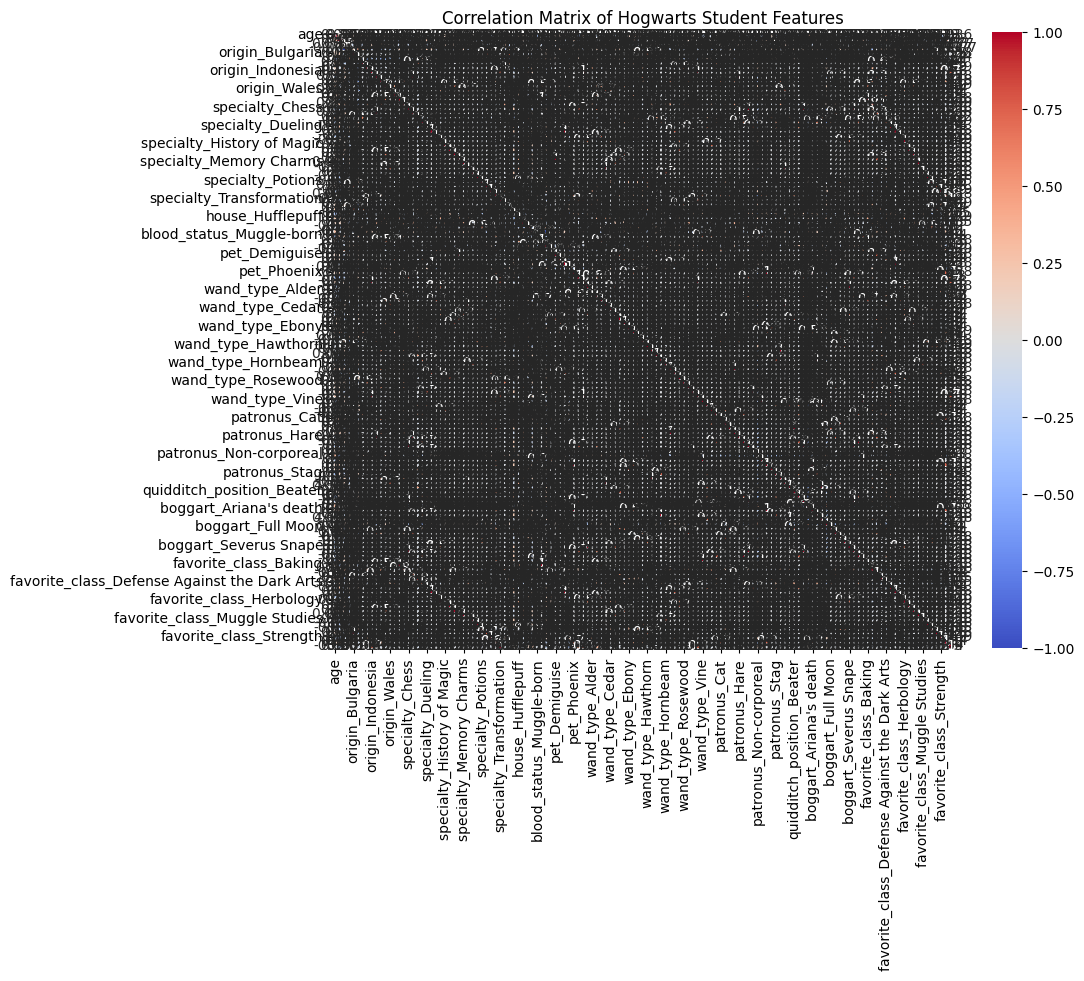

In [85]:
# Calculating the correlation matrix using only numerical data
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Hogwarts Student Features')
plt.show()

---

### **7.3 Interactive Charts for an Engaging Experience**

For a truly magical experience, we delve into the realm of interactive charts. These dynamic visualizations allow us to engage with the data in real-time, much like flipping through the pages of a spellbook that writes itself. Tools like Plotly and Bokeh provide this interactivity, turning our static charts into living, breathing entities.

_Behold_! This chart allows us to hover over different bars, revealing detailed information about the age distribution within each house. It’s like using the Marauder’s Map to track the movements of every student within the castle, offering a deeper level of engagement and understanding.

To uncover the deeper mysteries of our data, we turn to pair plots. These powerful visualizations allow us to see how multiple features interact with one another, much like observing the interplay of spells in a duel.

In this visualization, each plot reveals a different aspect of the dataset, from the relationship between age and wand type to the correlation between heritage and house. It's like seeing through the eyes of a Seer, gaining insight into the interconnectedness of the magical world.

---

## **7 Gemika's Pop-Up Quiz: Spotting the Trends**

And now, with our enchanted charts illuminating the data, it's time for Gemika's Pop-Up Quiz! Can you spot the trends and patterns we've revealed?

1. What does the count plot of Hogwarts Houses tell us about the distribution of students?
2. How do interactive charts enhance our understanding of the data?
3. What can pair plots reveal about the relationships between multiple features?

Answer these questions, and you'll prove your prowess in the magical art of data visualization. With each chart, we've not only gained insight into the world of Hogwarts but also learned how to use our magical tools to uncover the truth hidden within the data. Onward, to even more wondrous discoveries! 📊✨🧙‍♂️**

---